In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/clusters.csv')

In [20]:
# Define the mapping dictionary based on the cluster characteristics provided
recommendation_map = {
    #  Cluster 0: At-Risk/Struggling
    0: {
        "Action": "Start with a strict 1-hour focused study block daily; seek tutoring support.",
        "Tool": "Use a Pomodoro Timer app (25/5 technique) to build focus.",
        "Focus": "Discipline & Foundation",
        "Tip":"Focus on Effort, Not Outcome"
    },
    #  Cluster 1: Well-Balanced Achievers
    1: {
        "Action": "Maintain current successful holistic schedule and add 30 minutes of advanced topic exploration weekly.",
        "Tool": "Implement Active Recall (e.g., Anki flashcards) for mastery.",
        "Focus": "Optimization & Mastery",
        "Tip":"Seek Mentorship/Teach:"
    },
    #  Cluster 2: Stressed High Performers
    2: {
        "Action": "Prioritize wellness: Reduce scheduled study time by 30 mins/day and enforce a 7-hour minimum sleep rule.",
        "Tool": "Use a Mindfulness/Meditation app (e.g., Calm) during scheduled breaks.",
        "Focus": "Wellness & Efficiency",
        "Tip":"Define Goals"
    },
    #  Cluster 3: Naturally Gifted/Calm
    3: {
        "Action": "Dedicate 1 hour/week to an interdisciplinary project or advanced course material to maintain intellectual challenge.",
        "Tool": "Use a Project Management Tool (e.g., Notion/Trello) for complex ideas.",
        "Focus": "Enrichment & Challenge",
         "Tip":"Practice Public Speaking/Presentation:"
    }
}

In [21]:
# --- 2. Implement Recommendation Engine Function ---
def generate_recommendation(cluster_id):
    """Generates the recommendation dictionary based on ClusterID."""
    # Uses the dictionary defined in Step 1
    recommendation_map = {
        0: {"Action": "Start with a strict 1-hour focused study block daily; seek tutoring support.",
            "Tool": "Use a Pomodoro Timer app (25/5 technique) to build focus.",
            "Focus": "Discipline & Foundation",
            "Tip":"Focus on Effort, Not Outcome"},
        1: {"Action": "Maintain current successful holistic schedule and add 30 minutes of advanced topic exploration weekly.",
            "Tool": "Implement Active Recall (e.g., Anki flashcards) for mastery.",
            "Focus": "Optimization & Mastery",
            "Tip":"Seek Mentorship/Teach:"},
        2: {"Action": "Prioritize wellness: Reduce scheduled study time by 30 mins/day and enforce a 7-hour minimum sleep rule.",
            "Tool": "Use a Mindfulness/Meditation app (e.g., Calm) during scheduled breaks.",
            "Focus": "Wellness & Efficiency",
            "Tip":"Define Goals"},
        3: {"Action": "Dedicate 1 hour/week to an interdisciplinary project or advanced course material to maintain intellectual challenge.",
            "Tool": "Use a Project Management Tool (e.g., Notion/Trello) for complex ideas.",
            "Focus": "Enrichment & Challenge",
            "Tip":"Practice Public Speaking/Presentation:"}
    }
    return recommendation_map.get(cluster_id, {"Action": "Error: Unknown Cluster", "Tool": "N/A", "Focus": "Error"})

In [22]:
# --- 3. Add Recommendations to Dataset ---
# Apply the function to the 'Cluster' column
data['Recommendation_Details'] = data['Cluster'].apply(generate_recommendation)

# Extract the mandatory 'Recommendation' column (Action)
data['Recommendation'] = data['Recommendation_Details'].apply(lambda x: x['Action'])

# Extract the optional 'Tools' column
data['Tool'] = data['Recommendation_Details'].apply(lambda x: x['Tool'])

# Verification
print("✅ Recommendations added to the dataset.")
print("\nSnapshot of Recommended Actions:")
print(data[['student_id', 'Cluster', 'Recommendation', 'Tool']].head())
print("-" * 60)

✅ Recommendations added to the dataset.

Snapshot of Recommended Actions:
   student_id  Cluster                                     Recommendation  \
0      100000        2  Prioritize wellness: Reduce scheduled study ti...   
1      100001        2  Prioritize wellness: Reduce scheduled study ti...   
2      100002        1  Maintain current successful holistic schedule ...   
3      100003        3  Dedicate 1 hour/week to an interdisciplinary p...   
4      100004        3  Dedicate 1 hour/week to an interdisciplinary p...   

                                                Tool  
0  Use a Mindfulness/Meditation app (e.g., Calm) ...  
1  Use a Mindfulness/Meditation app (e.g., Calm) ...  
2  Implement Active Recall (e.g., Anki flashcards...  
3  Use a Project Management Tool (e.g., Notion/Tr...  
4  Use a Project Management Tool (e.g., Notion/Tr...  
------------------------------------------------------------


/tmp/ipython-input-727176775.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


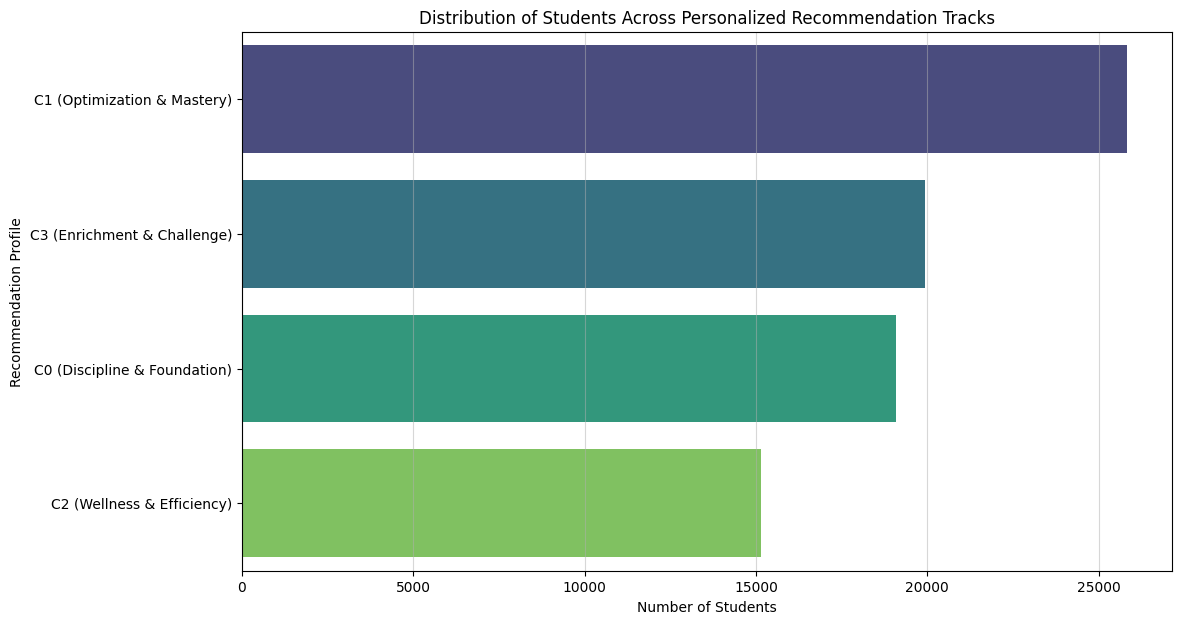

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# --- 4. Visualizations: Count Plot ---

plt.figure(figsize=(12, 7))

# Create a clean label by combining the Cluster ID and the Focus area
data['Rec_Label'] = data.apply(
    lambda row: f"C{row['Cluster']} ({row['Recommendation_Details']['Focus']})",
    axis=1
)

sns.countplot(
    y='Rec_Label',
    data=data,
    order=data['Rec_Label'].value_counts().index,
    palette='viridis'
)

plt.title('Distribution of Students Across Personalized Recommendation Tracks')
plt.xlabel('Number of Students')
plt.ylabel('Recommendation Profile')
plt.grid(axis='x', alpha=0.5)
plt.show()

# Clean up the temporary column
data.drop(columns=['Recommendation_Details', 'Rec_Label'], inplace=True)

In [24]:
data.to_csv('Rcommendation_Engine.csv',index=False)